[View in Colaboratory](https://colab.research.google.com/github/uyathiraj/Call-log-analyzer/blob/master/call_log_analysis.ipynb)

In [0]:
import pandas as pd

In [50]:
from google.colab import files
uploaded = files.upload()

for file in uploaded.keys():
  print("file uploaded ",file)



Saving call_logs.json to call_logs (1).json
file uploaded  call_logs.json


In [0]:
with open('calls.json','w') as f:
  f.write(uploaded['call_logs.json'].decode('utf-8'))
  

In [0]:
with open('calls.json', 'r') as myfile:
    data=myfile.read().replace('\n', '')

In [0]:
import json
json_data = json.loads(data)
#print(json_data)

In [0]:
call_logs = json_data['call_logs']


In [0]:
cols = ['number','call_type','start_timestamp','duration','contact_name']
df_data = pd.DataFrame(columns = cols)


In [0]:
import datetime

i=0
for k in call_logs:
  lst = call_logs[k]
  for item in lst:
    item['number'] = k
    item['start_timestamp'] = datetime.datetime.fromtimestamp(int(item['start_timestamp'])).strftime('%Y-%m-%d %H:%M:%S')
    
    df_data.loc[i] = pd.Series(item)
    i=i+1
    

In [0]:
def find_frequency_df(df_data,col,newcols='count'):
  df_freq = pd.DataFrame({newcols : df_data.groupby(col).size()}).reset_index()
  print(len(df_freq))
  return df_freq
  

In [0]:
from IPython.display import HTML,display
def display_text(text):
  display(HTML('<h2>'+text+'</h2>'))

In [0]:
import matplotlib.pyplot as plt
import numpy as np
def plot_bar_chart(total_items, y_values, x_values, title, xlabel, ylabel, rotation=0):
    plt.figure(figsize=(18,10))
    plt.bar(np.arange(total_items), y_values,color=['violet','indigo','blue','green', 'yellow', 'orange','red' ])
    plt.xticks(np.arange(total_items),x_values,rotation=rotation)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [0]:
def plot_pie_chart(labels,sizes,title):
  #labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
  #sizes = [15, 30, 45, 10]
  #explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, labeldistance=1.1,autopct='%1.1f%%',
        shadow=True, startangle=90)
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.title(title,y=1.08)
  #plt.title(figure_title, y=1.08)
  plt.show()

In [0]:
df_cleaned = df_data.dropna()
#print("Length :",len(df_cleaned))
df_cleaned

In [0]:
def update_user(df_temp):
  df_temp.loc[:,'contact_name'] = [('user'+str(i)) for i in range(0,len(df_temp))]

In [112]:
df_num = find_frequency_df(df_cleaned,'contact_name','num_count')#
#update_user(df_num)

58


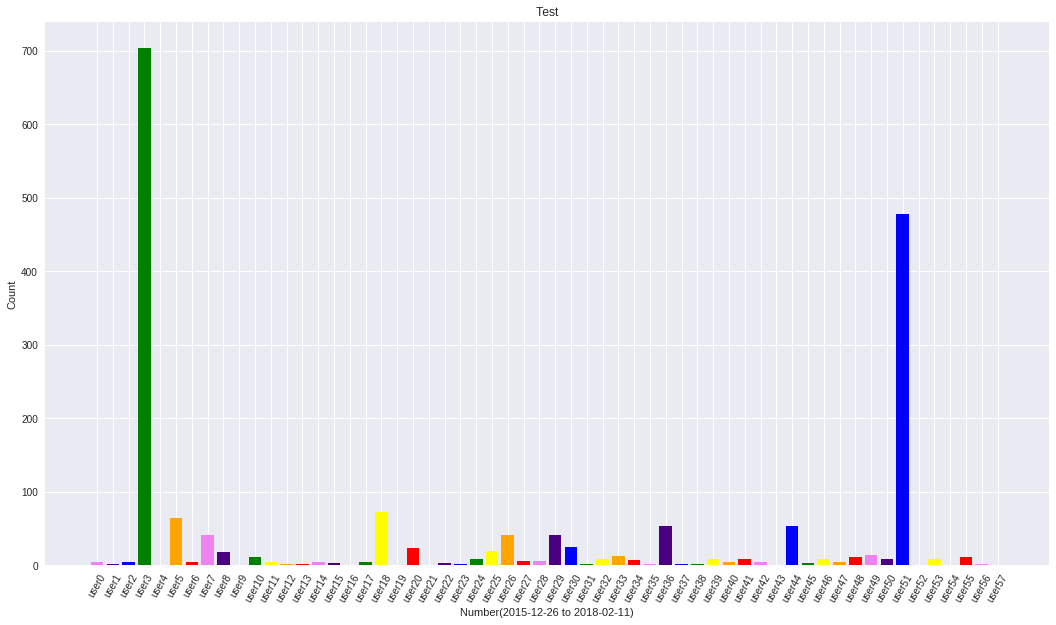

In [113]:
plot_bar_chart(len(df_num),df_num['num_count'],df_num['contact_name'],"Test","Number(2015-12-26 to 2018-02-11)","Count",rotation=60)

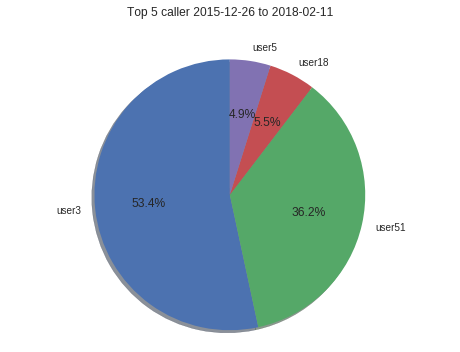

,contact_name,num_count
3,user3,704
51,user51,478
18,user18,73
5,user5,64
44,user44,54


In [136]:
df_sorted = df_num.sort_values(['num_count'],ascending =False)

plot_pie_chart(df_sorted.loc[:5,'contact_name'],df_sorted.loc[:5,'num_count'],"Top 5 caller 2015-12-26 to 2018-02-11")

display_text('Top 5 callers ')
df_sorted.head()

3


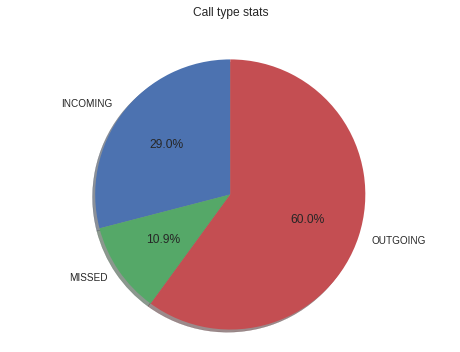

In [125]:
df_call = find_frequency_df(df_cleaned,['call_type'],'count_call_type')
plot_pie_chart(df_call['call_type'],df_call['count_call_type'],"Call type stats")

In [129]:
df_calls = find_frequency_df(df_cleaned,['contact_name','call_type'],'count')
#update_user(df_calls)

109


In [0]:
def call_stats(df_temp,call_type):
  df_call = df_temp.loc[df_temp['call_type'] == call_type]
  display_text("Top 5 people who gives "+call_type+ ' calls')
  print((df_call.sort_values(['count'],ascending = False)).head())
  plot_bar_chart(len(df_call),df_call['count'],df_call['contact_name'],call_type +" stats","Contact Name","Count",rotation=60)

   contact_name call_type  count
6         user6    MISSED     82
97       user97    MISSED     55
10       user10    MISSED     12
15       user15    MISSED      8
56       user56    MISSED      8


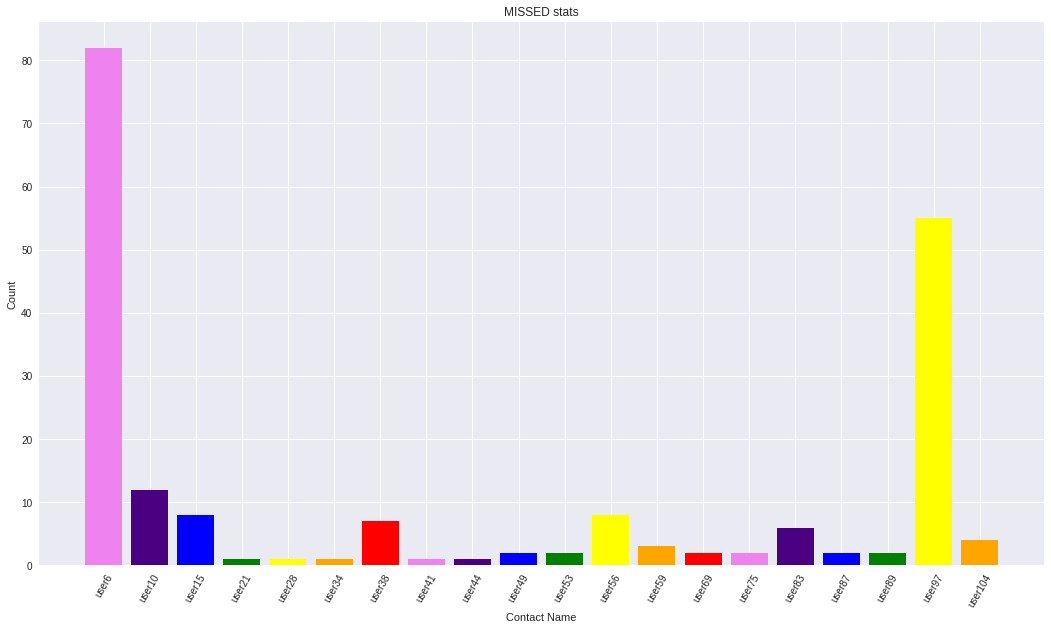

In [153]:
#Who gives more miss call
call_stats(df_calls,'MISSED')

   contact_name call_type  count
5         user5  INCOMING    200
96       user96  INCOMING    170
9         user9  INCOMING     20
48       user48  INCOMING     17
68       user68  INCOMING     15


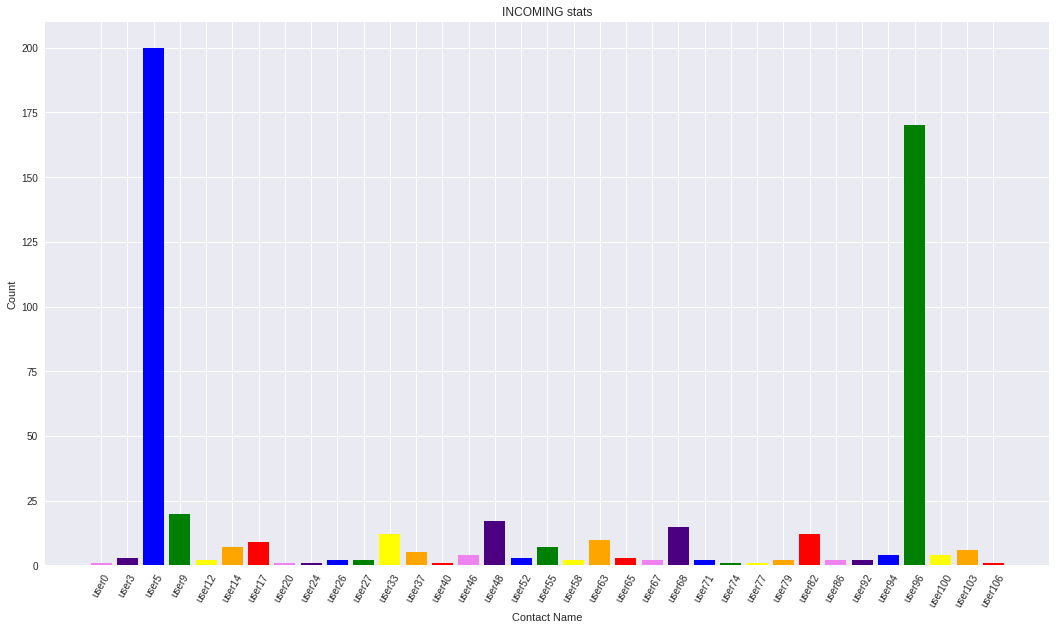

In [154]:
call_stats(df_calls,'INCOMING')

   contact_name call_type  count
7         user7  OUTGOING    422
98       user98  OUTGOING    253
35       user35  OUTGOING     60
84       user84  OUTGOING     36
70       user70  OUTGOING     36


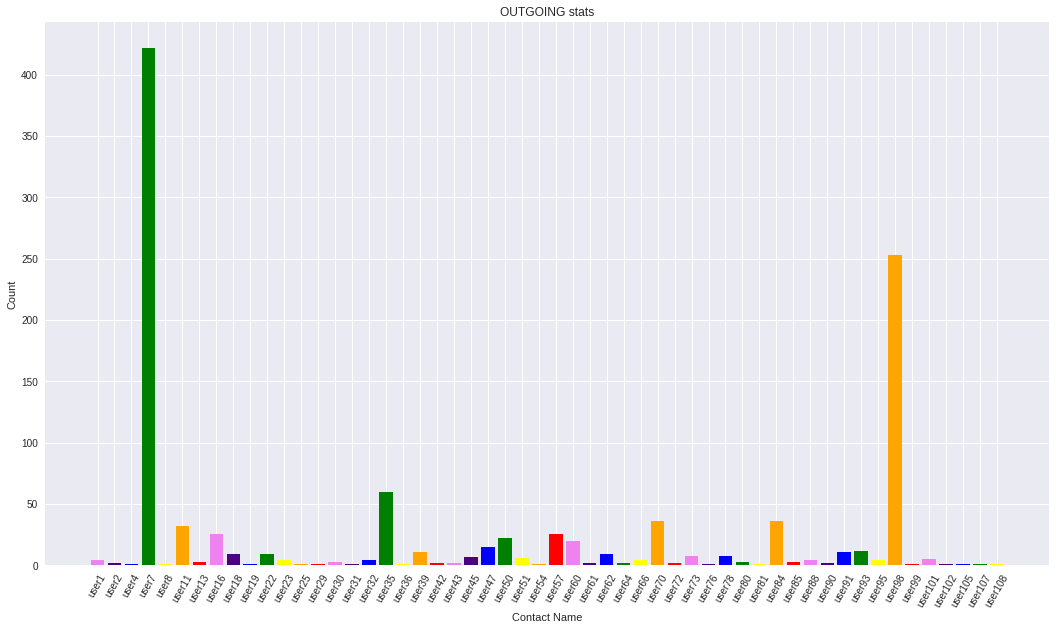

In [156]:
call_stats(df_calls,'OUTGOING')

In [157]:
#df_time = [x.split(' ')[0] for x in df_cleaned['start_timestamp']]
#find_frequency_df(df_cleaned,['start_timestamp'],'count')
date =[]
for x in df_cleaned['start_timestamp']:
  spl = x.split(' ')[0].split('-')
  date.append(spl[0]+'-'+spl[1])
df_cleaned['date'] = date
#df_cleaned

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [158]:
df_date = find_frequency_df(df_cleaned,['date'],'count')


8


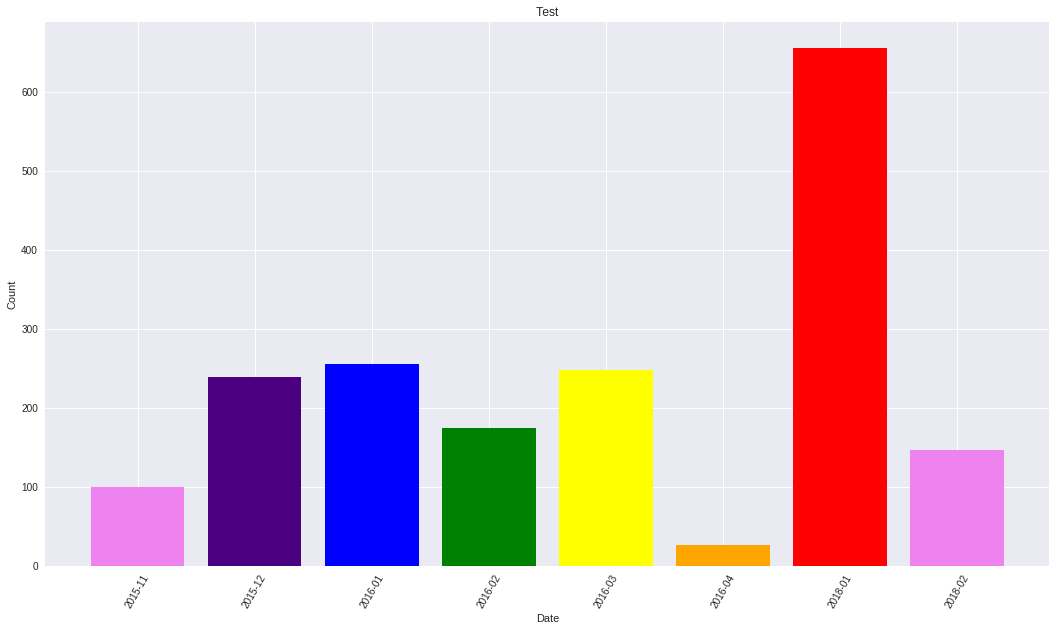

In [159]:
plot_bar_chart(len(df_date),df_date['count'],df_date['date'],"Test",'Date','Count',rotation=60)